# Load Data

In [27]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/comp-3220-credit-card-fraud-2024/sample_fraud_submission.csv
/kaggle/input/comp-3220-credit-card-fraud-2024/fraud_test.csv
/kaggle/input/comp-3220-credit-card-fraud-2024/fraud_train.csv


In [28]:
df = pd.read_csv('/kaggle/input/comp-3220-credit-card-fraud-2024/fraud_train.csv')

# Understand Data

In [29]:
df.shape

(80000, 9)

In [30]:
df.head(20)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud,card_no
0,3.091847,1.532477,1.717581,1.0,0.0,0.0,0.0,0,30020
1,5.650517,3.026613,4.092868,1.0,0.0,0.0,1.0,1,78725
2,40.349809,6.638186,1.290949,1.0,1.0,0.0,1.0,0,35631
3,6.844254,4.673873,0.413126,1.0,1.0,0.0,1.0,0,96397
4,5.992280,0.090814,4.325565,1.0,0.0,1.0,1.0,0,49230
5,7.167288,2.367711,12.051182,1.0,0.0,0.0,1.0,1,64526
6,19.019043,0.081605,0.218948,1.0,0.0,0.0,1.0,0,60385
7,3.029299,2.881492,4.137494,1.0,0.0,0.0,1.0,1,14414
8,6.575994,11.778356,0.617833,1.0,0.0,0.0,0.0,0,56015
9,1.571024,22.215874,6.662329,0.0,0.0,0.0,1.0,1,66069


# Analyse Data

<Axes: >

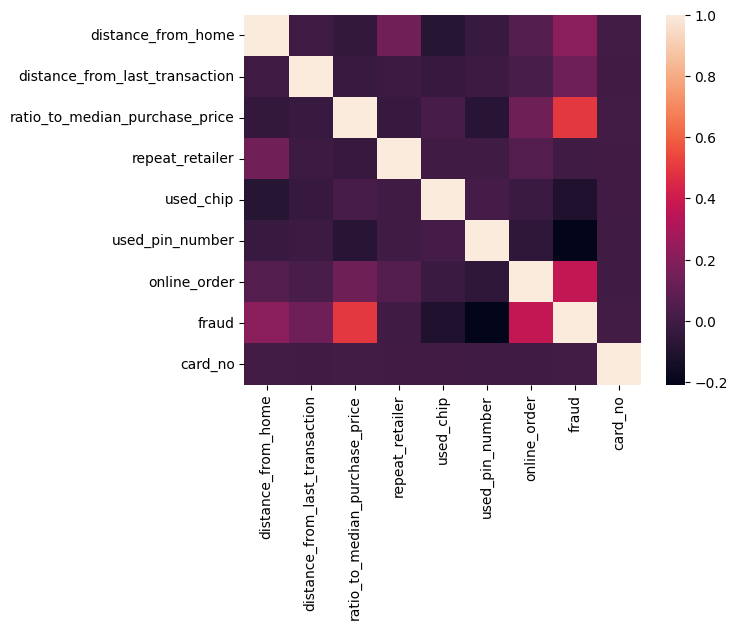

In [31]:
import seaborn as sns
cormap = df.corr()
sns.heatmap(cormap)

In [32]:
round(cormap,2)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud,card_no
distance_from_home,1.00,-0.01,-0.05,0.14,-0.08,-0.03,0.05,0.21,0.00
distance_from_last_transaction,-0.01,1.00,-0.03,-0.01,-0.03,-0.02,0.02,0.13,0.00
ratio_to_median_purchase_price,-0.05,-0.03,1.00,-0.03,0.02,-0.08,0.13,0.50,0.01
repeat_retailer,0.14,-0.01,-0.03,1.00,-0.00,-0.00,0.05,-0.00,0.00
used_chip,-0.08,-0.03,0.02,-0.00,1.00,0.01,-0.02,-0.11,-0.00
used_pin_number,-0.03,-0.02,-0.08,-0.00,0.01,1.00,-0.06,-0.21,-0.00
online_order,0.05,0.02,0.13,0.05,-0.02,-0.06,1.00,0.37,-0.00
fraud,0.21,0.13,0.50,-0.00,-0.11,-0.21,0.37,1.00,0.01
card_no,0.00,0.00,0.01,0.00,-0.00,-0.00,-0.00,0.01,1.00


<Axes: >

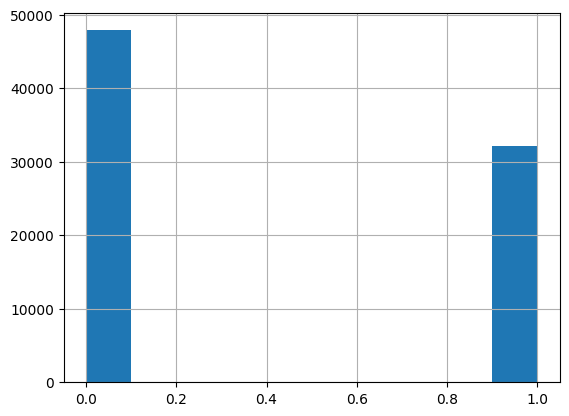

In [33]:
df['fraud'].hist()

<Axes: >

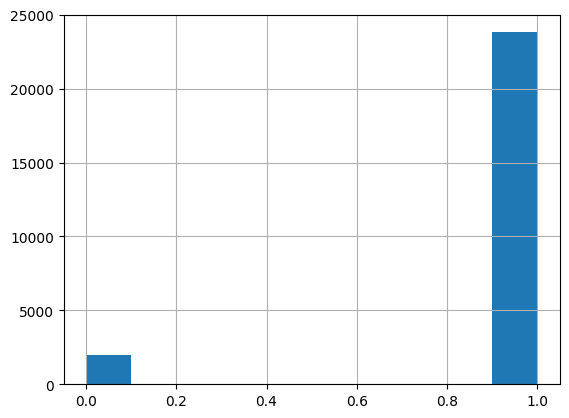

In [34]:
df['fraud'][df['ratio_to_median_purchase_price']> 4].hist()

<Axes: >

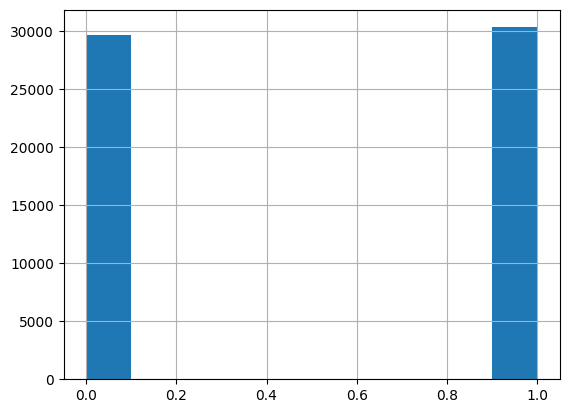

In [35]:
df['fraud'][df['online_order']== 1].hist()

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   distance_from_home              80000 non-null  float64
 1   distance_from_last_transaction  80000 non-null  float64
 2   ratio_to_median_purchase_price  80000 non-null  float64
 3   repeat_retailer                 80000 non-null  float64
 4   used_chip                       80000 non-null  float64
 5   used_pin_number                 80000 non-null  float64
 6   online_order                    80000 non-null  float64
 7   fraud                           80000 non-null  int64  
 8   card_no                         80000 non-null  int64  
dtypes: float64(7), int64(2)
memory usage: 5.5 MB


# Define X and Y values

In [76]:
x = df[['ratio_to_median_purchase_price', 'online_order', 'distance_from_home', 'distance_from_last_transaction','repeat_retailer', 'used_chip', 'used_pin_number']].values
y = df['fraud'].values

In [77]:
x.shape


(80000, 7)

In [64]:
y.shape

(80000,)

# Normalise X values

In [78]:
import sklearn
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x = sc.fit_transform(x)

# Define Train_Test_Split

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((64000, 7), (16000, 7))

# Logistc Regression Model

In [80]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
log_model.score(X_test, y_test)

0.9390625

# Decision Tree Classifier

In [81]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
tree_model.score(X_test, y_test)

0.9998125

# SVM

In [82]:
from sklearn import svm
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
svm_model.score(X_test, y_test)

0.98825

# Simple Neural Network

In [85]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

s_model = Sequential([
    Dense(64, activation= 'relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [87]:
s_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [92]:
history = s_model.fit(X_train, y_train, batch_size=32, epochs=50)

Epoch 1/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6041 - loss: 0.0000e+00
Epoch 2/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6016 - loss: 0.0000e+00
Epoch 3/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.5993 - loss: 0.0000e+00
Epoch 4/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6040 - loss: 0.0000e+00
Epoch 5/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6030 - loss: 0.0000e+00
Epoch 6/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6066 - loss: 0.0000e+00
Epoch 7/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.5997 - loss: 0.0000e+00
Epoch 8/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6005 - loss: 0.0000e+00
Epoch 9/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6022 - loss: 0.0000e+00
Epoch 10/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6031 - loss: 0.0000e+00
Epoch 11/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6031 - los

# Simple Neural Network (+100 Neurons)

In [104]:
new_s_model = Sequential([
    Dense(164, activation= 'relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [105]:
new_s_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [106]:
new_history = new_s_model.fit(X_train, y_train, batch_size=32, epochs=50)

Epoch 1/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.5989 - loss: 0.0000e+00
Epoch 2/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6031 - loss: 0.0000e+00
Epoch 3/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6015 - loss: 0.0000e+00
Epoch 4/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6015 - loss: 0.0000e+00
Epoch 5/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6006 - loss: 0.0000e+00
Epoch 6/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.5990 - loss: 0.0000e+00
Epoch 7/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6033 - loss: 0.0000e+00
Epoch 8/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.5987 - loss: 0.0000e+00
Epoch 9/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6022 - loss: 0.0000e+00
Epoch 10/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6011 - loss: 0.0000e+00
Epoch 11/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.5969 - los

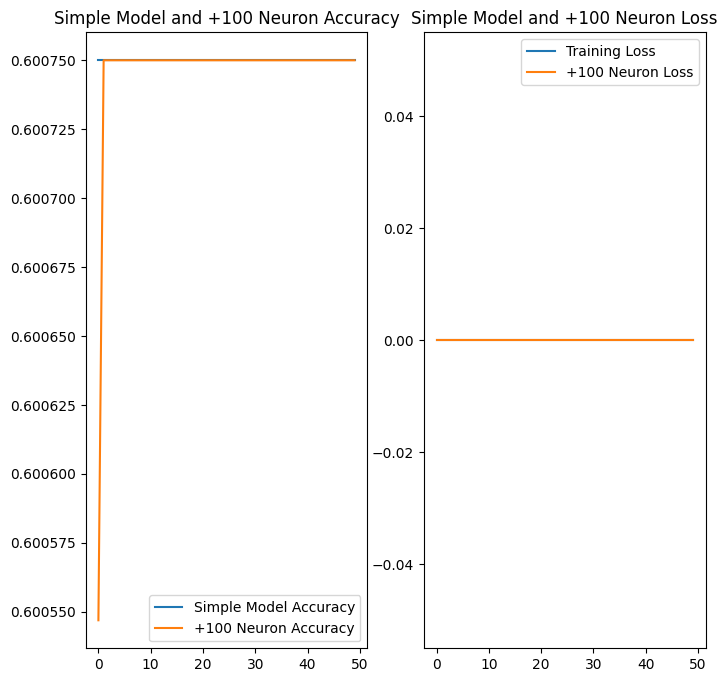

In [107]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
new_acc = new_history.history['accuracy']

loss = history.history['loss']
new_loss = history.history['loss']

epochs_range = range(50)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Simple Model Accuracy')
plt.plot(epochs_range, new_acc, label='+100 Neuron Accuracy')
plt.legend(loc='lower right')
plt.title('Simple Model and +100 Neuron Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, new_loss, label='+100 Neuron Loss')
plt.legend(loc='upper right')
plt.title('Simple Model and +100 Neuron Loss')
plt.show()

In [109]:
s_model.evaluate(X_test, y_test)

500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5962 - loss: 0.0000e+00


[0.0, 0.5910624861717224]

In [110]:
new_s_model.evaluate(X_test, y_test)

500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5962 - loss: 0.0000e+00


[0.0, 0.5910624861717224]

# Predict Using Tree Classifier Model

In [111]:
df_test = pd.read_csv('/kaggle/input/comp-3220-credit-card-fraud-2024/fraud_test.csv')

In [112]:
df_test.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,card_no
0,0.322477,0.750535,1.216245,0.0,1.0,1.0,1.0,14487
1,2.930222,0.010856,0.351132,1.0,0.0,0.0,0.0,16733
2,10.918088,0.407638,35.296636,1.0,0.0,0.0,1.0,90819
3,27.824534,1.917857,7.977137,1.0,0.0,0.0,1.0,38793
4,8.852025,16.931587,0.230846,1.0,0.0,0.0,0.0,19484


In [113]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   distance_from_home              20000 non-null  float64
 1   distance_from_last_transaction  20000 non-null  float64
 2   ratio_to_median_purchase_price  20000 non-null  float64
 3   repeat_retailer                 20000 non-null  float64
 4   used_chip                       20000 non-null  float64
 5   used_pin_number                 20000 non-null  float64
 6   online_order                    20000 non-null  float64
 7   card_no                         20000 non-null  int64  
dtypes: float64(7), int64(1)
memory usage: 1.2 MB


In [120]:
X_new = df_test[['ratio_to_median_purchase_price', 'online_order', 'distance_from_home', 'distance_from_last_transaction','repeat_retailer', 'used_chip', 'used_pin_number']].values

In [121]:
X_new = sc.transform(X_new)

In [122]:
X_new

array([[-0.4513119 ,  0.57760045, -0.38736429, ..., -2.72074966,
         1.45878536,  3.72608654],
       [-0.64071631, -1.73130058, -0.36228833, ...,  0.36754576,
        -0.6855018 , -0.26837809],
       [ 7.01011424,  0.57760045, -0.28547734, ...,  0.36754576,
        -0.6855018 , -0.26837809],
       ...,
       [-0.57171732,  0.57760045, -0.16147826, ...,  0.36754576,
        -0.6855018 , -0.26837809],
       [-0.64233776,  0.57760045, -0.37319566, ..., -2.72074966,
        -0.6855018 , -0.26837809],
       [-0.56983949,  0.57760045, -0.09601247, ...,  0.36754576,
         1.45878536, -0.26837809]])

In [123]:
y_pred = tree_model.predict(X_new)

In [124]:
y_pred

array([0, 0, 1, ..., 0, 0, 0])

In [125]:
df_submission = {'card_no': df_test['card_no'], 'fraud': y_pred}
df_submission = pd.DataFrame(data=df_submission)

In [126]:
df_submission.head()

,card_no,fraud
0,14487,0
1,16733,0
2,90819,1
3,38793,1
4,19484,0


In [127]:
df_submission.to_csv('submission2.csv', index=False)